# Weather hourly data
## Lo Barnechea, Chile (from April 20 to 27th)

Data from MeteoBlue:

https://www.meteoblue.com/es/tiempo/archive/export/lo-barnechea_chile_3882797

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#!ls

In [4]:
df = pd.read_csv('./history_export_2018-04-27T22_28_32.csv', sep=';', header=10)
df.shape # Raw data: 47,192 measurements with 17 columns

(192, 17)

In [5]:
df.head()

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Total Precipitation [sfc],Snowfall amount raw [sfc],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd],Wind Speed [80 m above gnd],Wind Direction [80 m above gnd],Wind Speed [900 mb],Wind Direction [900 mb]
0,2018,4,20,0,0,17.57,7.0,1014.8,0.0,0.0,0.0,15.99,54.16,12.25,65.70,6.03,72.65
1,2018,4,20,1,0,17.42,3.0,1014.7,0.0,0.0,0.0,16.99,53.62,12.57,66.37,6.49,56.31
2,2018,4,20,2,0,16.99,3.0,1014.3,0.0,0.0,0.0,17.28,54.32,13.10,69.08,4.10,52.13
3,2018,4,20,3,0,16.42,2.0,1014.2,0.0,0.0,0.0,18.22,52.22,13.91,68.75,6.88,42.88
4,2018,4,20,4,0,16.05,2.0,1014.4,0.0,0.0,0.0,18.22,52.22,13.10,69.08,5.00,30.26


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 17 columns):
Year                                  192 non-null int64
Month                                 192 non-null int64
Day                                   192 non-null int64
Hour                                  192 non-null int64
Minute                                192 non-null int64
Temperature  [2 m above gnd]          192 non-null float64
Relative Humidity  [2 m above gnd]    192 non-null float64
Mean Sea Level Pressure  [MSL]        192 non-null float64
Total Precipitation  [sfc]            192 non-null float64
Snowfall amount raw  [sfc]            192 non-null float64
Shortwave Radiation  [sfc]            192 non-null float64
Wind Speed  [10 m above gnd]          192 non-null float64
Wind Direction  [10 m above gnd]      192 non-null float64
Wind Speed  [80 m above gnd]          192 non-null float64
Wind Direction  [80 m above gnd]      192 non-null float64
Wind Speed  [900 mb]

### Clean Data

In [7]:
df_c = df
del df_c['Year']
del df_c['Month']
del df_c['Day']
del df_c['Minute']

In [8]:
del df_c['Snowfall amount raw  [sfc]']
del df_c['Wind Speed  [80 m above gnd]']
del df_c['Wind Direction  [80 m above gnd]']
del df_c['Wind Speed  [900 mb]']
del df_c['Wind Direction  [900 mb]']

In [9]:
del df_c['Total Precipitation  [sfc]']

In [10]:
df_c.head()

,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
0,0,17.57,7.0,1014.8,0.0,15.99,54.16
1,1,17.42,3.0,1014.7,0.0,16.99,53.62
2,2,16.99,3.0,1014.3,0.0,17.28,54.32
3,3,16.42,2.0,1014.2,0.0,18.22,52.22
4,4,16.05,2.0,1014.4,0.0,18.22,52.22


In [11]:
df_c.tail()

,Hour,Temperature [2 m above gnd],Relative Humidity [2 m above gnd],Mean Sea Level Pressure [MSL],Shortwave Radiation [sfc],Wind Speed [10 m above gnd],Wind Direction [10 m above gnd]
187,19,16.76,25.0,1015.8,108.58,12.41,16.86
188,20,17.10,21.0,1015.9,0.00,18.86,23.63
189,21,16.78,18.0,1016.2,0.00,18.51,26.57
190,22,16.01,14.0,1016.3,0.00,22.07,28.24
191,23,15.65,13.0,1016.0,0.00,26.12,29.74


In [12]:
df_c.columns = ['hour', 'temp', 'humi', 'presSl', 'radi', 'wSpeed', 'wDir']

In [13]:
df.describe()

,hour,temp,humi,presSl,radi,wSpeed,wDir
count,192.000000,192.00000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,11.500000,17.14724,15.369792,1015.788542,201.598906,14.921667,130.347083
std,6.940284,2.83130,12.113500,1.379572,265.641148,5.613930,128.968394
min,0.000000,12.25000,1.000000,1013.100000,0.000000,1.800000,1.300000
25%,5.750000,14.79500,7.000000,1014.575000,0.000000,10.700000,32.987500
50%,11.500000,16.41000,12.000000,1015.800000,0.000000,14.725000,42.880000
75%,17.250000,19.34500,22.000000,1016.900000,450.340000,18.390000,290.435000
max,23.000000,23.99000,60.000000,1018.400000,724.460000,26.600000,355.760000


In [14]:
df.corr()

,hour,temp,humi,presSl,radi,wSpeed,wDir
hour,1.000000,0.387044,0.576083,0.163992,0.294137,-0.345718,0.269120
temp,0.387044,1.000000,0.141137,-0.287279,0.850636,-0.557746,0.755637
humi,0.576083,0.141137,1.000000,0.450302,0.227499,-0.524445,0.234823
presSl,0.163992,-0.287279,0.450302,1.000000,-0.002699,-0.052033,0.040350
radi,0.294137,0.850636,0.227499,-0.002699,1.000000,-0.512081,0.888351
wSpeed,-0.345718,-0.557746,-0.524445,-0.052033,-0.512081,1.000000,-0.532563
wDir,0.269120,0.755637,0.234823,0.040350,0.888351,-0.532563,1.000000


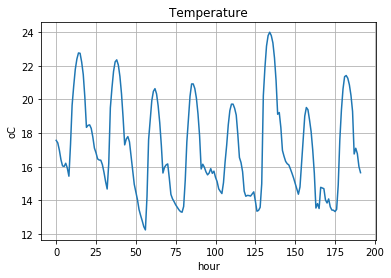

In [15]:
plt.xlabel('hour')
plt.ylabel('oC')
plt.title('Temperature')
plt.grid()
plt.plot(df_c['temp'])

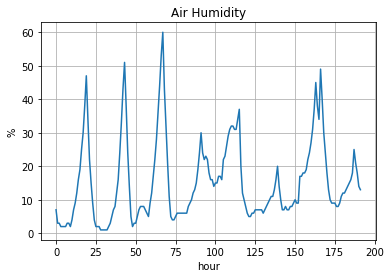

In [16]:
plt.xlabel('hour')
plt.ylabel('%')
plt.title('Air Humidity')
plt.grid()
plt.plot(df_c['humi'])

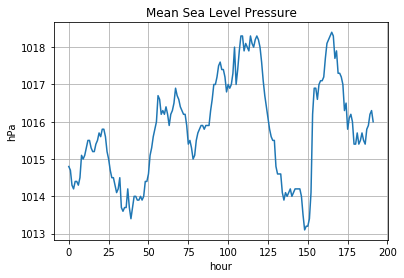

In [17]:
plt.xlabel('hour')
plt.ylabel('hPa')
plt.title('Mean Sea Level Pressure')
plt.grid()
plt.plot(df_c['presSl'])

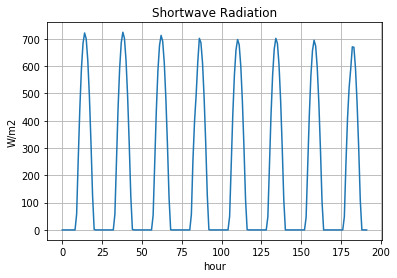

In [18]:
plt.xlabel('hour')
plt.ylabel('W/m2')
plt.title('Shortwave Radiation')
plt.grid()
plt.plot(df_c['radi'])

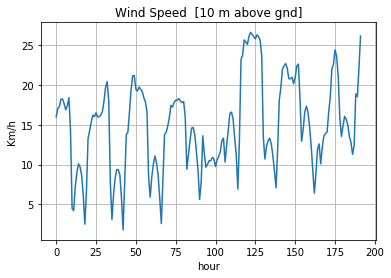

In [19]:
plt.xlabel('hour')
plt.ylabel('Km/h')
plt.title('Wind Speed  [10 m above gnd]')
plt.grid()
plt.plot(df_c['wSpeed'])

Winds are stronger during the night and at mornings (dir W)

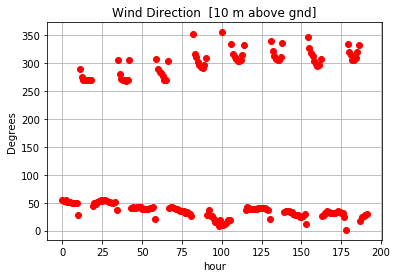

In [20]:
plt.xlabel('hour')
plt.ylabel('Degrees')
plt.title('Wind Direction  [10 m above gnd]')
plt.grid()
plt.plot(df_c['wDir'],'ro')

from 11:00 to 18:00 in general wind direction is "W" (300o). Other hours is toward NorthEast (NE) - (50o)

### Graph Range of Wing Angles

In [21]:
def plotWindRange(pnt1, pnt2):
    fig = plt.figure(figsize=(10, 10))
    ax = plt.subplot(111, projection = 'polar')
    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.margins(0)

    ax.plot([0, 0], [0, 30], 'ow')
    for i in range (pnt1, pnt2):
        ws = df_c.loc[i,'wSpeed']
        wd = df_c.loc[i,'wDir']      # wind direction in degrees
        theta = wd*np.pi/180
        #print("Sample:", i, "  Wind Speed:", ws, "  Wind Direction:", wd)
        ax.plot([0, theta], [0, ws], linewidth=4)
    

In [22]:
from ipywidgets import interact, interactive, IntSlider, Layout, interact_manual
import ipywidgets as widgets
from IPython.display import display

In [23]:
val = widgets.IntRangeSlider(description='Range:', max=len(df_c['wDir']))

IntRangeSlider(value=(48, 144), description='Range:', max=192)

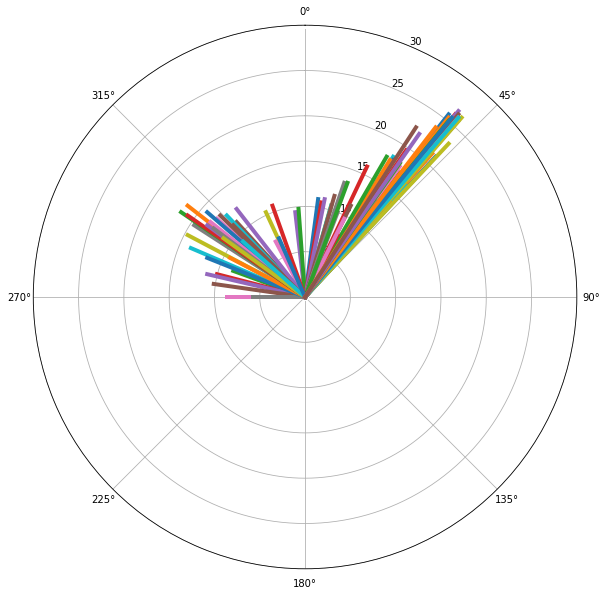

In [24]:
display(val)
plotWindRange(val.value[0], val.value[1])